In [1]:
# import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
mpl.rcParams["figure.dpi"] = 150
import seaborn as sns
import os
import datetime as dt
# enable copy on write (default in pandas 3.0)
pd.options.mode.copy_on_write = True

In [2]:
def read_merged(weather, year):
    return pd.read_csv('../merged/merged_{}_{}.csv.gz'.format(weather, year))


# Using multiple years of tornados

In [3]:
meso = [read_merged("mesocyclone", year) for year in range(2015, 2024)]

/tmp/ipykernel_17403/3053837900.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv('../merged/merged_{}_{}.csv.gz'.format(weather, year))
/tmp/ipykernel_17403/3053837900.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv('../merged/merged_{}_{}.csv.gz'.format(weather, year))
/tmp/ipykernel_17403/3053837900.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv('../merged/merged_{}_{}.csv.gz'.format(weather, year))
/tmp/ipykernel_17403/3053837900.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  return pd.read_csv('../merged/merged_{}_{}.csv.gz'.format(weather, year))
/tmp/ipykernel_17403/3053837900.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
 

In [4]:
data = pd.concat(meso)
del meso

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6247284 entries, 0 to 699146
Data columns (total 20 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Unnamed: 0      int64  
 1   index           int64  
 2   DATE            object 
 3   LAT_mean        float64
 4   LON_mean        float64
 5   STR_RANK_max    object 
 6   LL_ROT_VEL_max  int64  
 7   LL_DV_max       int64  
 8   LL_BASE_max     int64  
 9   DEPTH_KFT_max   int64  
 10  DPTH_STMRL_max  int64  
 11  MAX_RV_KFT_max  int64  
 12  MAX_RV_KTS_max  int64  
 13  TVS_max         object 
 14  MSI_max         int64  
 15  county          object 
 16  state           object 
 17  Month           object 
 18  power_outage    bool   
 19  Event Month     object 
dtypes: bool(1), float64(2), int64(10), object(7)
memory usage: 959.2+ MB


In [6]:
data.sample(10)

,Unnamed: 0,index,DATE,LAT_mean,LON_mean,STR_RANK_max,LL_ROT_VEL_max,LL_DV_max,LL_BASE_max,DEPTH_KFT_max,DPTH_STMRL_max,MAX_RV_KFT_max,MAX_RV_KTS_max,TVS_max,MSI_max,county,state,Month,power_outage,Event Month
63019,63019,30298,2020-01-11,34.768040,-90.071147,7L,52,100,10,33,100,10,52,N,5277,De Soto County,Mississippi,January,False,NaN
79789,79789,81149,2016-03-29,26.118930,-80.490050,5,32,0,9,12,0,17,35,N,3130,Broward County,Florida,NaN,False,NaN
64753,64753,63809,2015-04-13,41.972180,-96.181160,5L,32,27,3,16,43,5,33,N,2759,Monona County,Iowa,NaN,False,NaN
490509,490509,440253,2017-09-11,30.637030,-83.217100,6,37,55,9,12,100,9,37,N,3534,Echols County,Georgia,September,True,NaN
236926,236926,183900,2023-04-16,31.116800,-93.972590,3,17,21,15,22,77,15,17,N,1288,Jasper County,Texas,NaN,False,NaN
206720,206720,152387,2023-04-01,42.179010,-87.120800,5,29,28,9,16,97,12,29,N,2574,LaPorte County,Indiana,NaN,False,April
394200,394200,333810,2018-08-01,35.626410,-105.533142,6,31,49,15,22,100,25,31,N,2914,San Miguel County,New Mexico,NaN,False,NaN
144167,144167,79060,2020-02-10,33.307220,-116.858775,5L,38,38,2,5,100,4,51,N,4319,Riverside County,California,NaN,False,NaN
357797,357797,327469,2022-06-15,44.983730,-90.909530,7,39,43,16,22,92,16,39,N,2905,Chippewa County,Wisconsin,June,False,NaN
416072,416072,372044,2019-05-26,40.043515,-88.280655,8,43,77,11,18,100,11,43,N,3350,Champaign County,Illinois,NaN,False,NaN


In [12]:
data['TVS_max'].value_counts()

N    6203409
Y      43875
Name: TVS_max, dtype: int64

In [15]:
del data['Unnamed: 0']
del data['index']
del data['Event Month']
del data['Month']
data['TVS_max'] = 1*(data['TVS_max'] == 'Y')
data['DATE'] = pd.to_datetime(data['DATE'])
data['Month'] = data['DATE'].dt.month

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346371 entries, 0 to 39465
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   DATE                  346371 non-null  datetime64[ns]
 1   LAT_mean              346371 non-null  float64       
 2   LON_mean              346371 non-null  float64       
 3   AVGDV_max             346371 non-null  int64         
 4   LLDV_max              346371 non-null  int64         
 5   MXDV_max              346371 non-null  int64         
 6   MXDV_HEIGHT_max       346371 non-null  int64         
 7   DEPTH_max             346371 non-null  float64       
 8   MAX_SHEAR_max         346371 non-null  int64         
 9   MAX_SHEAR_HEIGHT_max  346371 non-null  float64       
 10  county                346371 non-null  object        
 11  state                 346371 non-null  object        
 12  Month                 346371 non-null  int64         
 13  

In [8]:
cols = data.columns
cols

Index(['DATE', 'LAT_mean', 'LON_mean', 'STR_RANK_max', 'LL_ROT_VEL_max',
       'LL_DV_max', 'LL_BASE_max', 'DEPTH_KFT_max', 'DPTH_STMRL_max',
       'MAX_RV_KFT_max', 'MAX_RV_KTS_max', 'TVS_max', 'MSI_max', 'county',
       'state', 'power_outage', 'Month'],
      dtype='object')

In [9]:
data['power_outage'].value_counts(normalize=True)

False    0.960052
True     0.039948
Name: power_outage, dtype: float64

In [16]:
features = ['LAT_mean', 'LON_mean', 'LL_ROT_VEL_max',
       'LL_DV_max', 'DPTH_STMRL_max', 'MAX_RV_KTS_max', 'TVS_max', 'MSI_max','Month']

In [63]:
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, make_scorer

In [18]:
meso_train, meso_test = train_test_split(data, test_size=0.2, stratify=data.power_outage)

In [19]:
meso_tt, meso_val = train_test_split(meso_train, test_size=0.2, stratify=meso_train.power_outage)

In [92]:
outage = meso_tt[meso_tt['power_outage']==True]
no_outage = meso_tt[meso_tt['power_outage']==False]
no_outage= no_outage.sample(n=10*len(outage), random_state=101)
balanced = pd.concat([outage,no_outage],axis=0)

In [78]:
model = xgboost.XGBClassifier(
    objective= 'binary:logistic', enable_categorical=True,
    seed=42)

parameters = {
    'max_depth': range (11, 17,  1),
    'n_estimators': range(200, 500, 20),
    'learning_rate': [0.01, 0.03]
}

# Grid search
# grid_search = GridSearchCV(model,
#     param_grid=parameters,
#     scoring='f1',
#     n_jobs=10,
#     cv = 3,
#     verbose=15)
# grid_search.fit(balanced[features], balanced['power_outage'])

# Randomized Search 
random_search = RandomizedSearchCV(model,
     param_distributions=parameters,
     n_iter=60,
     scoring='f1',
     refit = False,
     n_jobs=8,
     cv = 3,
     verbose=15)
random_search.fit(balanced[features], balanced['power_outage'])

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV 3/3; 2/60] START learning_rate=0.01, max_depth=13, n_estimators=260.........
[CV 3/3; 2/60] END learning_rate=0.01, max_depth=13, n_estimators=260;, score=0.831 total time=  45.5s
[CV 1/3; 6/60] START learning_rate=0.03, max_depth=14, n_estimators=420.........
[CV 1/3; 6/60] END learning_rate=0.03, max_depth=14, n_estimators=420;, score=0.835 total time=  57.3s
[CV 3/3; 8/60] START learning_rate=0.03, max_depth=14, n_estimators=260.........
[CV 3/3; 8/60] END learning_rate=0.03, max_depth=14, n_estimators=260;, score=0.837 total time=  40.2s
[CV 2/3; 11/60] START learning_rate=0.01, max_depth=12, n_estimators=240........
[CV 2/3; 11/60] END learning_rate=0.01, max_depth=12, n_estimators=240;, score=0.827 total time=  29.9s
[CV 1/3; 15/60] START learning_rate=0.01, max_depth=15, n_estimators=400........
[CV 1/3; 15/60] END learning_rate=0.01, max_depth=15, n_estimators=400;, score=0.836 total time= 1.9min


/home/painchess/.local/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV 3/3; 1/60] START learning_rate=0.01, max_depth=13, n_estimators=200.........
[CV 3/3; 1/60] END learning_rate=0.01, max_depth=13, n_estimators=200;, score=0.826 total time=  37.4s
[CV 2/3; 4/60] START learning_rate=0.03, max_depth=14, n_estimators=280.........
[CV 2/3; 4/60] END learning_rate=0.03, max_depth=14, n_estimators=280;, score=0.836 total time=  41.1s
[CV 1/3; 8/60] START learning_rate=0.03, max_depth=14, n_estimators=260.........
[CV 1/3; 8/60] END learning_rate=0.03, max_depth=14, n_estimators=260;, score=0.836 total time=  40.5s
[CV 3/3; 10/60] START learning_rate=0.01, max_depth=11, n_estimators=320........
[CV 3/3; 10/60] END learning_rate=0.01, max_depth=11, n_estimators=320;, score=0.822 total time=  30.2s
[CV 1/3; 13/60] START learning_rate=0.03, max_depth=12, n_estimators=320........
[CV 1/3; 13/60] END learning_rate=0.03, max_depth=12, n_estimators=320;, score=0.833 total time=  28.2s
[CV 3/3; 15/60] START learning_rate=0.01, max_depth=15, n_estimators=400......

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=True,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=60, n_jobs=8,
                   param_distributions={'learning_rate': [0.01, 0.03],
                                        'max_depth': range(11, 17),
                                        'n_estimators': range(200, 500, 20)},
                   refit=False, scoring='f1', verbose=15)

In [24]:
grid_search.estimator

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [79]:
#res = grid_search.cv_results_
res = random_search.cv_results_

pars = [tuple(par.values()) for par in res['params']]
scores = np.array(res['mean_test_score'])
param_scores = dict(zip(pars, scores))
param_scores

{(200, 13, 0.01): 0.8272275558116341,
 (260, 13, 0.01): 0.8305829563387283,
 (380, 11, 0.01): 0.8240990499270914,
 (280, 14, 0.03): 0.8359596034939564,
 (200, 12, 0.01): 0.8236362352231299,
 (420, 14, 0.03): 0.8353393637435663,
 (220, 14, 0.03): 0.8357707196252703,
 (260, 14, 0.03): 0.8359136638212502,
 (300, 12, 0.01): 0.8281109198993398,
 (320, 11, 0.01): 0.822529407315312,
 (240, 12, 0.01): 0.8258398551355287,
 (300, 11, 0.03): 0.8284166533186835,
 (320, 12, 0.03): 0.8324589018087387,
 (320, 12, 0.01): 0.82878739491567,
 (400, 15, 0.01): 0.8360755623496404,
 (460, 13, 0.01): 0.833377823266952,
 (280, 16, 0.03): 0.8353542070514784,
 (420, 11, 0.01): 0.8248131472523378,
 (460, 14, 0.03): 0.8350076441083482,
 (380, 12, 0.01): 0.8298533594291103,
 (420, 12, 0.03): 0.8329974055710903,
 (360, 15, 0.01): 0.8358256592232381,
 (300, 13, 0.03): 0.8341885188007855,
 (420, 13, 0.01): 0.8332523287825694,
 (300, 14, 0.01): 0.8345913819207258,
 (460, 11, 0.03): 0.8305719177445089,
 (220, 11, 0.01)

In [80]:
#grid_search.best_params_
random_search.best_params_


{'n_estimators': 440, 'max_depth': 16, 'learning_rate': 0.01}

In [93]:
best_model = xgboost.XGBClassifier(
    objective= 'binary:logistic', learning_rate=0.01, max_depth=16, n_estimators=440)
best_model.fit(balanced[features], balanced['power_outage'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=440, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [94]:
prec = precision_score(best_model.predict(meso_val[features]), meso_val['power_outage'])
recall = recall_score(best_model.predict(meso_val[features]), meso_val['power_outage'])
print("precision: ", prec)
print("recall: ", recall)

precision:  0.2449725776965265
recall:  0.4218015609503687


In [87]:
best_model.get_booster().get_score(importance_type='gain')

{'LAT_mean': 11.998180389404297,
 'LON_mean': 16.021921157836914,
 'LL_ROT_VEL_max': 2.2873291969299316,
 'LL_DV_max': 2.319385528564453,
 'DPTH_STMRL_max': 6.398529529571533,
 'MAX_RV_KTS_max': 2.8266963958740234,
 'TVS_max': 4.625914096832275,
 'MSI_max': 2.6701462268829346,
 'Month': 35.68828582763672}

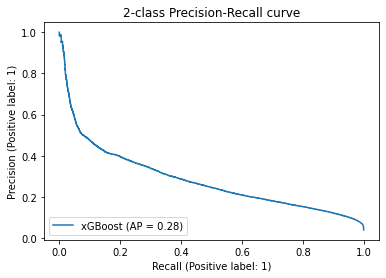

In [91]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    best_model, meso_val[features], meso_val['power_outage'], name="xGBoost")
_ = display.ax_.set_title("2-class Precision-Recall curve")

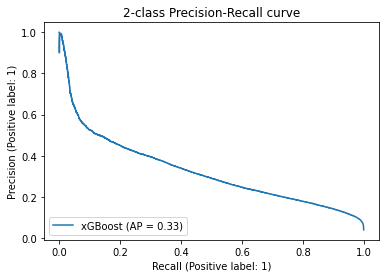

In [95]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    best_model, meso_val[features], meso_val['power_outage'], name="xGBoost")
_ = display.ax_.set_title("2-class Precision-Recall curve")